## Assignment - 06 Bank details Logistic Regression

### import necessary libraries

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:
Bank_full_data = pd.read_csv('bank-full.csv',sep=';')
Bank_full_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
Bank_full_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
Bank_full_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
Bank_full_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
# select columns
columns = ['age', 'balance', 'duration', 'campaign', 'y']
Bank_full_data_sel = Bank_full_data[columns]
Bank_full_data_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


### Barplot for the dependent variable

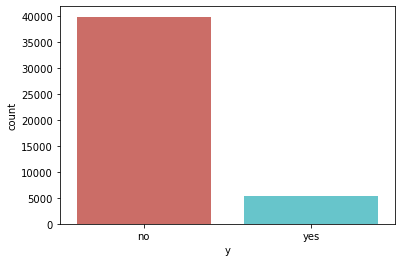

In [14]:
sns.countplot(x='y',data=Bank_full_data, palette='hls')
plt.show()

### Customer job distribution

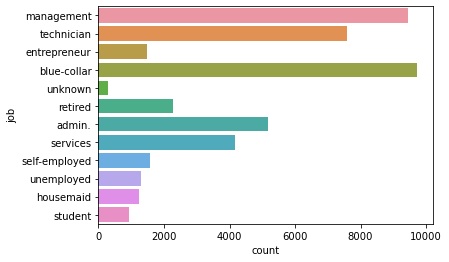

In [15]:
sns.countplot(y="job", data=Bank_full_data)
plt.show()

### Customer marital status distribution

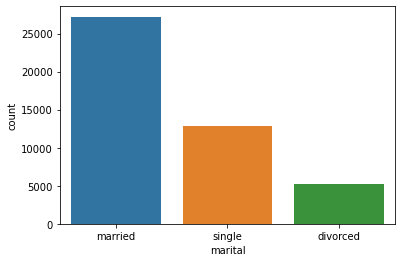

In [16]:
sns.countplot(x="marital", data=Bank_full_data)
plt.show()

### Barplot for credit in default

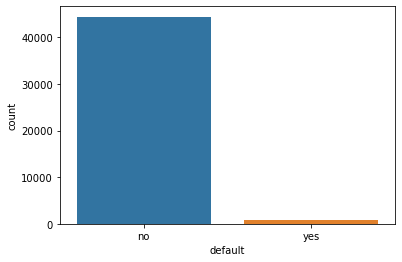

In [17]:
sns.countplot(x="default", data=Bank_full_data)
plt.show()

### Barplot for housing loan

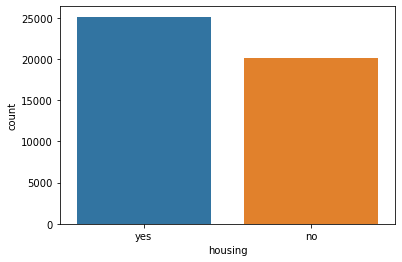

In [18]:
sns.countplot(x="housing", data=Bank_full_data)
plt.show()

### Barplot for personal loan

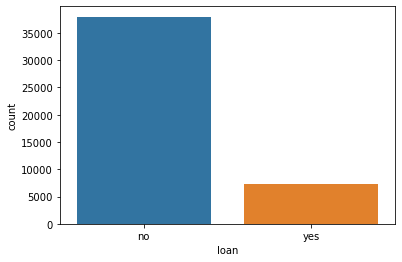

In [19]:
sns.countplot(x="loan", data=Bank_full_data)
plt.show()

### Barplot for previous marketing campaign outcome

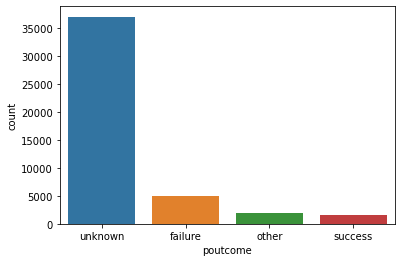

In [20]:
sns.countplot(x="poutcome", data=Bank_full_data)
plt.show()

## Data Preprocessing

### Create dummy variables, that is variables with only two values, zero and one.

In [33]:
columns = ['age', 'balance', 'duration', 'campaign', 'y']
Bank_full_data2 = Bank_full_data[columns]
Bank_full_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


<AxesSubplot:xlabel='age'>

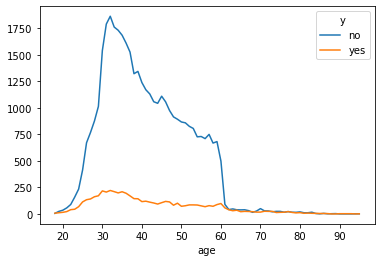

In [28]:
pd.crosstab(Bank_full_data2.age,Bank_full_data2.y).plot(kind="line")

#### graph shows that age group 20-60 has more rejection of application while 60-90 almost everybody.

<AxesSubplot:>

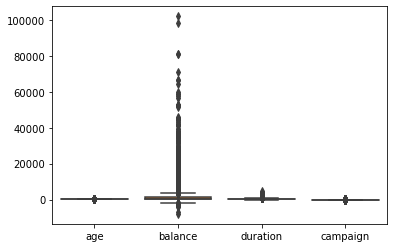

In [35]:
sb.boxplot(data =Bank_full_data2,orient = "v")

In [41]:
Bank_full_data2['outcome'] = Bank_full_data2.y.map({'no':0, 'yes':1})
Bank_full_data2.head(10)

C:\Users\User\AppData\Local\Temp/ipykernel_5500/981461433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bank_full_data2['outcome'] = Bank_full_data2.y.map({'no':0, 'yes':1})


,age,balance,duration,campaign,y,outcome
0,58,2143,261,1,no,0
1,44,29,151,1,no,0
2,33,2,76,1,no,0
3,47,1506,92,1,no,0
4,33,1,198,1,no,0
5,35,231,139,1,no,0
6,28,447,217,1,no,0
7,42,2,380,1,no,0
8,58,121,50,1,no,0
9,43,593,55,1,no,0


In [40]:
Bank_full_data2.tail(10)

,age,balance,duration,campaign,y,outcome
45201,53,583,226,1,yes,1
45202,34,557,224,1,yes,1
45203,23,113,266,1,yes,1
45204,73,2850,300,1,yes,1
45205,25,505,386,2,yes,1
45206,51,825,977,3,yes,1
45207,71,1729,456,2,yes,1
45208,72,5715,1127,5,yes,1
45209,57,668,508,4,no,0
45210,37,2971,361,2,no,0


<AxesSubplot:title={'center':'age'}, xlabel='outcome'>

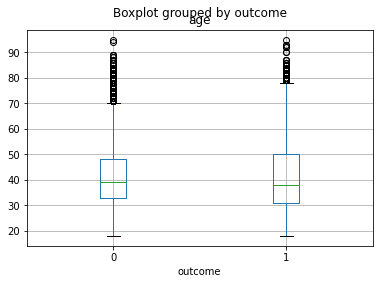

In [42]:
Bank_full_data2.boxplot(column='age', by='outcome')

#### probably not a great feature since lot of outliers

In [68]:
feature_col=['age','balance','duration','campaign']
output_target=['outcome']
X = Bank_full_data2[feature_col]
Y = Bank_full_data2[output_target]

In [69]:
classifier = LogisticRegression()

In [70]:
classifier.fit(X,Y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [71]:
classifier.coef_ # coefficients of features 

array([[ 7.69721553e-03,  3.72191064e-05,  3.54908898e-03,
        -1.39828305e-01]])

In [72]:
classifier.predict_proba (X) # Probability values 

array([[0.87367389, 0.12632611],
       [0.92488732, 0.07511268],
       [0.9459632 , 0.0540368 ],
       ...,
       [0.30553763, 0.69446237],
       [0.82336234, 0.17663766],
       [0.86407825, 0.13592175]])

In [73]:
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [78]:
confusion_matrix = confusion_matrix(Y,y_pred)
confusion_matrix

array([[39342,   580],
       [ 4435,   854]], dtype=int64)

Text(0.5, 15.0, 'Predicted Label')

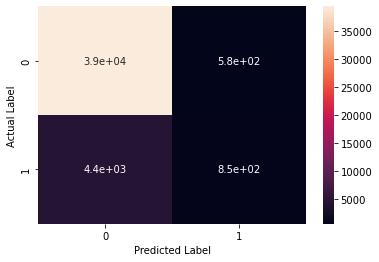

In [58]:
sb.heatmap(confusion_matrix, annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')